In [1]:
import os

# change working directory, run this cell once
os.chdir("../../")

# supress warnings
import warnings
warnings.filterwarnings("ignore")

This notebook will demonstrate how to use Bayesian Optimization + Warmstarting to fit handwritten digits dataset.

### Import packages

In [5]:
import autocluster
from autocluster import AutoCluster, get_evaluator, MetafeatureMapper
from sklearn import datasets
from collections import Counter
from sklearn.metrics.cluster import v_measure_score
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df = pd.DataFrame(datasets.load_digits(n_class=6)['data'])
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


We will be using the handwritten digits dataset from ``sklearn.dataset`` with 6 classes. 

### Fitting a clustering model using Bayesian Optimization (SMAC) + Warmstarting (Metalearning)
Before using the warmstarter, you need to:
1. Clone this repository
2. Copy the ``experiments`` folder and place it into your current working directory.

In [9]:
cluster = AutoCluster()
fit_params = {
    "df": df, 
    "cluster_alg_ls": [
        'KMeans', 'GaussianMixture', 'Birch', 
        'MiniBatchKMeans', 'AgglomerativeClustering', 'SpectralClustering'
    ], 
    "dim_reduction_alg_ls": [
        'TSNE', 'PCA', 'IncrementalPCA', 
        'KernelPCA', 'FastICA', 'TruncatedSVD'
    ],
    "optimizer": 'smac',
    "n_evaluations": 40,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 60,
    "preprocess_dict": {
        "numeric_cols": list(range(64)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore'], 
                               weights = [], clustering_num = None, 
                               min_proportion = .01),
    "n_folds": 3,
    "warmstart": True,
    "warmstart_datasets_dir": 'experiments/metaknowledge/benchmark_silhouette',
    "warmstart_metafeatures_table_path": 'experiments/metaknowledge/benchmark_silhouette_metafeatures_table.csv',
    "warmstart_n_neighbors": 10,
    "warmstart_top_n": 3,
    "general_metafeatures": MetafeatureMapper.getGeneralMetafeatures(),
    "numeric_metafeatures": MetafeatureMapper.getNumericMetafeatures(),
    "categorical_metafeatures": [],
    "verbose_level": 1,
}
result_dict = cluster.fit(**fit_params)

871/1083 datapoints remaining after outlier removal
Found 26 relevant intial configurations from warmstarter.
Truncated n_evaluations: 40
Fitting configuration: 
{'branching_factor___Birch': 291, 'dim_reduction_choice': 'TruncatedSVD', 'n_clusters___Birch': 45, 'clustering_choice': 'Birch', 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 9}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'branching_factor___Birch': 74, 'dim_reduction_choice': 'TruncatedSVD', 'n_clusters___Birch': 71, 'clustering_choice': 'Birch', 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 6}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'branching_factor___Birch': 55, 'dim_reduction_choice': 'TruncatedSVD', 'n_clusters___Birch': 78, 'clustering_choice': 'Birch', 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 8}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'branching_factor___Birch': 814, 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 7, 'n_clusters___Birch': 40, 'kernel___KernelPCA': 'linear', 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'branching_factor___Birch': 227, 'dim_reduction_choice': 'TruncatedSVD', 'n_clusters___Birch': 46, 'clustering_choice': 'Birch', 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 7}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'branching_factor___Birch': 149, 'dim_reduction_choice': 'TruncatedSVD', 'n_clusters___Birch': 38, 'clustering_choice': 'Birch', 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 5}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'branching_factor___Birch': 64, 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 8, 'n_clusters___Birch': 25, 'kernel___KernelPCA': 'linear', 'clustering_choice': 'Birch'}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'branching_factor___Birch': 857, 'dim_reduction_choice': 'IncrementalPCA', 'batch_size___IncrementalPCA': 748, 'n_clusters___Birch': 59, 'clustering_choice': 'Birch', 'n_components___IncrementalPCA': 3}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'linkage___AgglomerativeClustering': 'complete', 'affinity___AgglomerativeClustering': 'euclidean', 'kernel___KernelPCA': 'rbf', 'clustering_choice': 'AgglomerativeClustering', 'n_clusters___AgglomerativeClustering': 7, 'n_components___KernelPCA': 6}
Score obtained by this configuration: 0.27981443645008397
Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'linkage___AgglomerativeClustering': 'single', 'affinity___AgglomerativeClustering': 'euclidean', 'kernel___KernelPCA': 'rbf', 'clustering_choice': 'AgglomerativeClustering', 'n_clusters___AgglomerativeClustering': 6, 'n_components___KernelPCA': 4}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'linkage___AgglomerativeClustering': 'single', 'affinity___AgglomerativeClustering': 'l2', 'kernel___KernelPCA': 'rbf', 'clustering_choice': 'AgglomerativeClustering', 'n_clusters___AgglomerativeClustering': 7, 'n_components___KernelPCA': 4}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'branching_factor___Birch': 91, 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 12.0, 'n_clusters___Birch': 6, 'perplexity___TSNE': 84.03630134401256, 'clustering_choice': 'Birch', 'n_components___TSNE': 2}
Score obtained by this configuration: 0.25396819909413654
Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'linkage___AgglomerativeClustering': 'average', 'affinity___AgglomerativeClustering': 'cityblock', 'early_exaggeration___TSNE': 7.471032321220759, 'perplexity___TSNE': 175.48390215534172, 'clustering_choice': 'AgglomerativeClustering', 'n_clusters___AgglomerativeClustering': 9, 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 8.203390083753744, 'perplexity___TSNE': 231.40494920107596, 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 6, 'covariance_type___GaussianMixture': 'full', 'n_components___TSNE': 2}
Score obtained by this configuration: 0.27213286856810254
Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 8.3742023674892, 'perplexity___TSNE': 231.45241399045284, 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 6, 'covariance_type___GaussianMixture': 'full', 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'linkage___AgglomerativeClustering': 'complete', 'affinity___AgglomerativeClustering': 'manhattan', 'early_exaggeration___TSNE': 11.993398613338442, 'perplexity___TSNE': 192.4356661604625, 'clustering_choice': 'AgglomerativeClustering', 'n_clusters___AgglomerativeClustering': 6, 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'n_clusters___MiniBatchKMeans': 7, 'early_exaggeration___TSNE': 13.048424472811831, 'batch_size___MiniBatchKMeans': 715, 'perplexity___TSNE': 278.53955190071804, 'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'n_clusters___MiniBatchKMeans': 7, 'early_exaggeration___TSNE': 10.194958770285634, 'batch_size___MiniBatchKMeans': 967, 'perplexity___TSNE': 190.13168469295235, 'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: 0.2610407769680023
Fitting configuration: 
{'dim_reduction_choice': 'KernelPCA', 'linkage___AgglomerativeClustering': 'average', 'affinity___AgglomerativeClustering': 'cityblock', 'kernel___KernelPCA': 'cosine', 'clustering_choice': 'AgglomerativeClustering', 'n_clusters___AgglomerativeClustering': 16, 'n_components___KernelPCA': 8}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 12.0, 'n_clusters___KMeans': 5, 'perplexity___TSNE': 30.0, 'clustering_choice': 'KMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: 0.22241556644439697
Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'n_clusters___MiniBatchKMeans': 24, 'early_exaggeration___TSNE': 15.53647548157681, 'batch_size___MiniBatchKMeans': 142, 'perplexity___TSNE': 142.398512912927, 'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'n_clusters___MiniBatchKMeans': 72, 'early_exaggeration___TSNE': 10.90353307225767, 'batch_size___MiniBatchKMeans': 971, 'perplexity___TSNE': 44.631321499278506, 'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'linkage___AgglomerativeClustering': 'average', 'affinity___AgglomerativeClustering': 'cityblock', 'early_exaggeration___TSNE': 15.989483033735212, 'perplexity___TSNE': 131.58033120399173, 'clustering_choice': 'AgglomerativeClustering', 'n_clusters___AgglomerativeClustering': 32, 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'init_params___GaussianMixture': 'random', 'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 17.013787797593643, 'perplexity___TSNE': 243.96972791230746, 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 1, 'covariance_type___GaussianMixture': 'tied', 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'early_exaggeration___TSNE': 12.003372078454781, 'n_clusters___KMeans': 2, 'perplexity___TSNE': 38.05900164476127, 'clustering_choice': 'KMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: 0.2305012345314026
Fitting configuration: 
{'dim_reduction_choice': 'TruncatedSVD', 'n_clusters___MiniBatchKMeans': 4, 'batch_size___MiniBatchKMeans': 59, 'clustering_choice': 'MiniBatchKMeans', 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 6}
Score obtained by this configuration: 0.35762740209233784
Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'n_clusters___MiniBatchKMeans': 47, 'early_exaggeration___TSNE': 6.826835855604907, 'batch_size___MiniBatchKMeans': 512, 'perplexity___TSNE': 52.57456896888597, 'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'n_clusters___MiniBatchKMeans': 18, 'early_exaggeration___TSNE': 13.329293306310921, 'batch_size___MiniBatchKMeans': 403, 'perplexity___TSNE': 50.34467431503499, 'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: 0.29806628326574963
Fitting configuration: 
{'kernel___KernelPCA': 'rbf', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2, 'clustering_choice': 'KMeans', 'n_clusters___KMeans': 72}
Score obtained by this configuration: inf


Fitting configuration: 
{'algorithm___FastICA': 'parallel', 'dim_reduction_choice': 'FastICA', 'fun___FastICA': 'logcosh', 'n_components___FastICA': 3, 'n_clusters___KMeans': 36, 'whiten___FastICA': True, 'clustering_choice': 'KMeans'}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'n_clusters___MiniBatchKMeans': 7, 'early_exaggeration___TSNE': 11.674784077720986, 'batch_size___MiniBatchKMeans': 100, 'perplexity___TSNE': 45.98264047872127, 'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: 0.2291233241558075
Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'n_clusters___MiniBatchKMeans': 8, 'early_exaggeration___TSNE': 9.076243890920127, 'batch_size___MiniBatchKMeans': 12, 'perplexity___TSNE': 48.53307111166225, 'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: 0.2614167034626007
Fitting configuration: 
{'dim_reduction_choice': 'TruncatedSVD', 'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'sigmoid', 'assign_labels___SpectralClustering': 'discretize', 'algorithm___TruncatedSVD': 'randomized', 'n_clusters___SpectralClustering': 12, 'eigen_solver___SpectralClustering'

Process pynisher function call:
Traceback (most recent call last):
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/spectral.py", line 493, in fit
    assig

Fitting configuration: 
{'branching_factor___Birch': 459, 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 5, 'n_clusters___Birch': 25, 'kernel___KernelPCA': 'cosine', 'clustering_choice': 'Birch'}
Score obtained by this configuration: 0.3105699993855387
Fitting configuration: 
{'algorithm___FastICA': 'parallel', 'dim_reduction_choice': 'FastICA', 'fun___FastICA': 'cube', 'n_components___FastICA': 3, 'n_clusters___KMeans': 54, 'clustering_choice': 'KMeans'}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'n_clusters___MiniBatchKMeans': 3, 'early_exaggeration___TSNE': 10.562390185045437, 'batch_size___MiniBatchKMeans': 82, 'perplexity___TSNE': 81.5685322711995, 'clustering_choice': 'MiniBatchKMeans', 'n_components___TSNE': 2}
Score obtained by this configuration: 0.27131609121958417
Fitting configuration: 
{'init_params___GaussianMixture': 'random', 'dim_reduction_choice': 'TruncatedSVD', 'n_components___GaussianMixture': 10, 'clustering_choice': 'GaussianMixture', 'algorithm___TruncatedSVD': 'randomized', 'warm_start___GaussianMixture': True, 'covariance_type___GaussianMixture': 'diag', 'n_components___TruncatedSVD': 3}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'TSNE', 'linkage___AgglomerativeClustering': 'average', 'affinity___AgglomerativeClustering': 'manhattan', 'early_exaggeration___TSNE': 11.741499808283582, 'perplexity___TSNE': 95.34161394468437, 'clustering_choice': 'AgglomerativeClustering', 'n_clusters___AgglomerativeClustering': 10, 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'dim_reduction_choice': 'IncrementalPCA', 'batch_size___IncrementalPCA': 371, 'n_clusters___KMeans': 68, 'clustering_choice': 'KMeans', 'whiten___IncrementalPCA': True, 'n_components___IncrementalPCA': 3}
Score obtained by this configuration: inf


Fitting configuration: 
{'algorithm___FastICA': 'deflation', 'dim_reduction_choice': 'FastICA', 'fun___FastICA': 'cube', 'n_components___FastICA': 2, 'batch_size___MiniBatchKMeans': 964, 'whiten___FastICA': True, 'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 42}
Score obtained by this configuration: inf


Optimization is complete.
Took 586.71 seconds.
The optimal configuration is 
Configuration:
  clustering_choice, Value: 'KMeans'
  dim_reduction_choice, Value: 'TSNE'
  early_exaggeration___TSNE, Value: 12.0
  n_clusters___KMeans, Value: 5
  n_components___TSNE, Value: 2
  perplexity___TSNE, Value: 30.0



Important parameters to take note:
- ``warmstart_datasets_dir``: Don't change this unless you have ran metalearning on your own datasets.
- ``warmstart_metafeatures_table_path``: This is the path to a csv table with metafeatures of all datasets used for warmstarting. Don't change this unless you have ran metalearning on your own datasets.
- ``warmstart_n_neighbors``: During warmstarting, the closest ``N`` datasets on the metefeatures space will be chosen to retrieve some initial configurations for Bayesian Optimization. ``warmstart_n_neighbors`` refers to ``N``.
- ``warmstart_top_n``: During warmstarting, a list of ``K`` best configurations will be retrieved from each of the chosen 'similar' datasets. ``warmstart_top_n`` refers to ``K``.
- ``general_metafeatures``: General metafeatures used for computing the distance or 'similarity' between two datasets.
- ``numeric_metafeatures``: Numeric metafeatures used for computing the distance or 'similarity' between two datasets. Numeric here means the metafeatures are computed using only the numeric columns of a dataset.

In [16]:
result_dict['metafeatures'][0]

array([ 8.71000000e+02,  6.76964198e+00,  0.00000000e+00,  0.00000000e+00,
        4.94618255e-01,  9.35117997e-01,  4.19630207e-03, -1.32139604e+00,
       -6.94361220e-01,  1.63155299e+00,  4.94618255e-01,  2.42351176e+00,
       -3.11590242e-02,  4.74065879e+01, -1.48398554e+00,  1.02483389e-01,
       -6.90114415e-01,  2.75198822e-01,  4.42166884e+01, -1.30268721e-01,
       -8.92595764e-01,  0.00000000e+00, -2.36529976e+01, -1.13229811e-02,
       -3.00000000e+00,  2.00317863e-01,  8.66001149e+02, -1.64998297e+00,
        2.60112525e+00,  4.01657825e-01,  2.94618592e+01,  4.06250000e-01,
        2.87354014e-01])

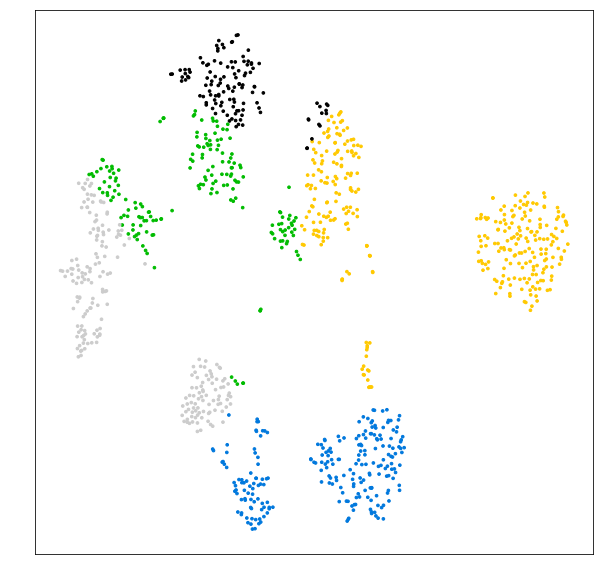

In [17]:
predictions = cluster.predict(df, save_plot=False)

In [18]:
Counter(predictions)

Counter({0: 121, 1: 234, 2: 183, 3: 334, 4: 211})

In [19]:
v_measure_score(predictions, datasets.load_digits(n_class=6)['target'])

0.5798941901171364

The V measure score is reasonably good given that we are just doing clustering. Refer to [sklearn's page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) for further explanation on v measure's interpretation.

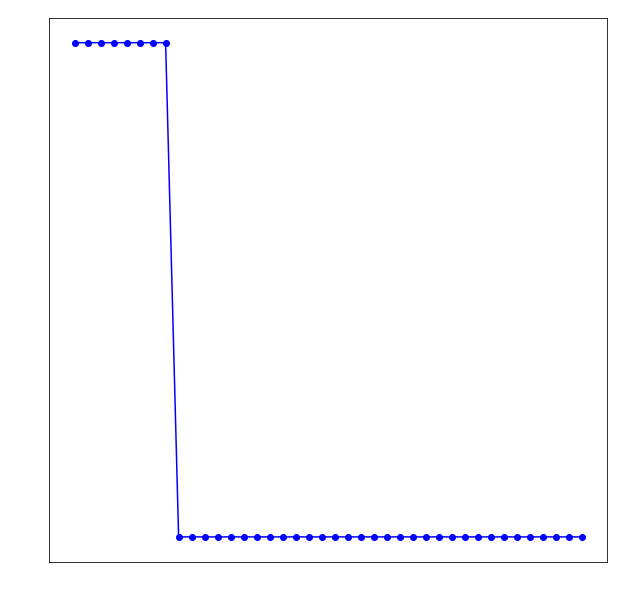

In [20]:
cluster.plot_convergence()

In [21]:
cluster.get_trajectory()

[({'algorithm___TruncatedSVD': 'randomized',
   'branching_factor___Birch': 291,
   'clustering_choice': 'Birch',
   'dim_reduction_choice': 'TruncatedSVD',
   'n_clusters___Birch': 45,
   'n_components___TruncatedSVD': 9},
  2147483648),
 ({'algorithm___TruncatedSVD': 'randomized',
   'branching_factor___Birch': 291,
   'clustering_choice': 'Birch',
   'dim_reduction_choice': 'TruncatedSVD',
   'n_clusters___Birch': 45,
   'n_components___TruncatedSVD': 9},
  2147483647.0),
 ({'affinity___AgglomerativeClustering': 'euclidean',
   'clustering_choice': 'AgglomerativeClustering',
   'dim_reduction_choice': 'KernelPCA',
   'kernel___KernelPCA': 'rbf',
   'linkage___AgglomerativeClustering': 'complete',
   'n_clusters___AgglomerativeClustering': 7,
   'n_components___KernelPCA': 6},
  0.27981443645008397),
 ({'branching_factor___Birch': 91,
   'clustering_choice': 'Birch',
   'dim_reduction_choice': 'TSNE',
   'early_exaggeration___TSNE': 12.0,
   'n_clusters___Birch': 6,
   'n_components_